In [61]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import dateutil
import plotly.graph_objects as go
from scipy import stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import requests

In [62]:
file_path = './all-states-history.csv'
url = 'https://api.covidtracking.com/v1/states/daily.csv'

with open(file_path, 'wb') as f:
    f.write(requests.get(url).content)

data = pd.read_csv(file_path)

In [63]:
data["date"] = data["date"].apply(str).apply(dateutil.parser.parse, dayfirst=False)

In [64]:
data.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death', 'hospitalized',
       'dateChecked', 'totalTestsViral', 'positiveTestsViral',
       'negativeTestsViral', 'positiveCasesViral', 'deathConfirmed',
       'deathProbable', 'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResultsIncrease', 'posNeg', 'dataQualityGrad

In [65]:
death_data = data[['date','death']].dropna()
death_data["date"] = death_data["date"].apply(str).apply(dateutil.parser.parse, dayfirst=False)
death_data.head()

,date,death
0,2021-02-16,287.0
1,2021-02-16,9257.0
2,2021-02-16,5287.0
3,2021-02-16,0.0
4,2021-02-16,14981.0


<AxesSubplot:xlabel='ID', ylabel='daily_death_count'>

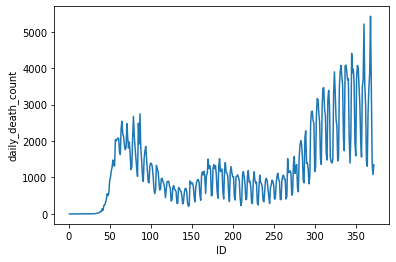

In [66]:
death_data = death_data.groupby(['date'])['death'].agg('sum').reset_index()
difference = death_data["death"].diff()
death_data["daily_death_count"] = difference
death_data = death_data.dropna()
death_data["ID"] = range(1, len(death_data) + 1)
sns.lineplot(x="ID", y="daily_death_count", data=death_data) 

<AxesSubplot:xlabel='date', ylabel='daily_death_count'>

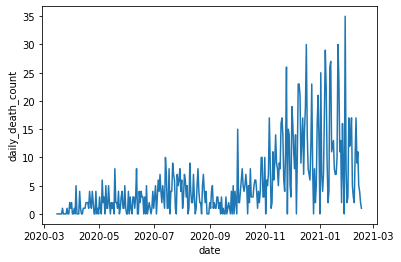

In [67]:
d = data[['date','death',"state"]].dropna()
ut_death = d[d['state']=='UT']

ut_death = ut_death.groupby(['date'])['death'].agg('sum').reset_index()
differ = ut_death["death"].diff()
ut_death["daily_death_count"] = differ
ut_death = ut_death.dropna()
sns.lineplot(x="date", y="daily_death_count", data=ut_death) 


In [68]:
def death_by_state(state):
    d = data[['date','death',"state"]].dropna()
    state_death = d[d['state']==state]

    state_death = state_death.groupby(['date'])['death'].agg('sum').reset_index()
    differ = state_death["death"].diff()
    state_death["daily_death_count"] = differ
    state_death = state_death.dropna()
    state_death["id"] = range(1, len(state_death) + 1)
    return state_death


<AxesSubplot:xlabel='id', ylabel='daily_death_count'>

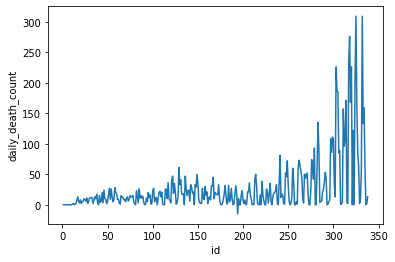

In [69]:
death_state = death_by_state("AL")
sns.lineplot(x="id", y="daily_death_count", data=death_state) 

In [70]:
death_data_by_state_ = data[['state', 'death']].dropna()
death_data_by_state_ = death_data_by_state_.groupby(['state'], sort=False)['death'].max().reset_index()

fig = go.Figure(data=go.Choropleth(
    locations=death_data_by_state_['state'], # Spatial coordinates
    z = death_data_by_state_['death'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "Thousands",
))

fig.update_layout(
    title_text = 'Covid death by states',
    geo_scope='usa', # limite map scope to USA
)

fig.show()


,state,positive,recovered,death
0,AL,482488.0,264621.0,9257.0
1,AR,313525.0,299107.0,5287.0
2,AZ,799740.0,112430.0,14981.0
3,CO,415037.0,22017.0,5828.0
4,CT,270822.0,9800.0,7449.0


(0.830702163153482, 2.779510166612449e-13)

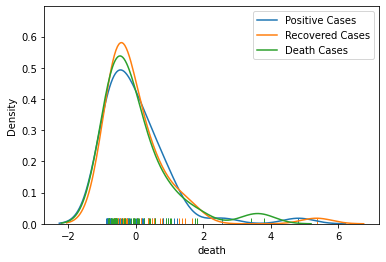

In [71]:
positive_vs_recover = data[['state', 'positive', 'recovered','death']].dropna()
positive_vs_recover = positive_vs_recover.groupby(['state'], sort=False)['positive', 'recovered', 'death'].max().reset_index()
display(positive_vs_recover.head())
display(stats.pearsonr(positive_vs_recover['positive'], positive_vs_recover['recovered']))
positive_vs_recover[['positive', 'recovered', 'death']] = StandardScaler().fit_transform(positive_vs_recover[['positive', 'recovered', 'death']])
plt.figure("Positive vs recovered distribution")
sns.distplot(positive_vs_recover['positive'], label="Positive Cases", rug=True, hist=False)
sns.distplot(positive_vs_recover['recovered'], label= "Recovered Cases", rug=True, hist=False)
sns.distplot(positive_vs_recover['death'], label= "Death Cases", rug=True, hist=False)
plt.legend()
plt.show()
#sns.regplot(x=positive_vs_recover['positive'], y=positive_vs_recover['recovered'])

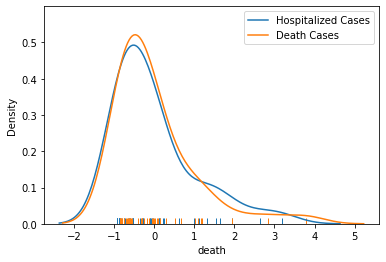

In [72]:
hospitalized_vs_death = data[['state', 'hospitalizedCumulative','death']].dropna()
hospitalized_vs_death = hospitalized_vs_death.groupby(['state'], sort=False)['hospitalizedCumulative', 'death'].max().reset_index()
hospitalized_vs_death[['hospitalizedCumulative', 'death']] = StandardScaler().fit_transform(hospitalized_vs_death[[ 'hospitalizedCumulative', 'death']])

plt.figure("Positive vs recovered distribution")
sns.distplot(hospitalized_vs_death['hospitalizedCumulative'], label="Hospitalized Cases", rug=True, hist=False)
sns.distplot(hospitalized_vs_death['death'], label= "Death Cases", rug=True, hist=False)
plt.legend()
plt.show()

(0.7752011899757227, 3.344622929954073e-67)

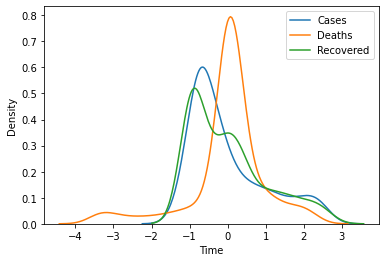

In [73]:
cases_vs_deaths = data[['date', 'positive', 'recovered', 'death']].dropna()
cases_vs_deaths = cases_vs_deaths.groupby(['date'], sort=True)['positive', 'recovered', 'death'].max().reset_index()
display(stats.pearsonr(cases_vs_deaths['positive'], cases_vs_deaths['death']))
cases_vs_deaths[['positive', 'recovered', 'death']] = StandardScaler().fit_transform(cases_vs_deaths[['positive', 'recovered', 'death']])

sns.distplot(cases_vs_deaths['positive'], label='Cases', hist=False)
sns.distplot(cases_vs_deaths['death'], label='Deaths', hist=False)
sns.distplot(cases_vs_deaths['recovered'], label='Recovered', hist=False, axlabel='Time')
plt.legend()
plt.show()

In [74]:
cases_per_death_by_state = data[['state', 'death', 'positive']].dropna()
cases_per_death_by_state = cases_per_death_by_state.groupby(['state'], sort=False)['death', 'positive'].max().reset_index()
cases_per_death_by_state['ratio'] = (cases_per_death_by_state['death'] / cases_per_death_by_state['positive']).dropna()
display(cases_per_death_by_state)

fig = go.Figure(data=go.Choropleth(
    locations=cases_per_death_by_state['state'], # Spatial coordinates
    z = cases_per_death_by_state['ratio'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds'
))

fig.update_layout(
    title_text = 'Covid deaths per positive test by state',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

,state,death,positive,ratio
0,AK,287.0,54736.0,0.005243
1,AL,9257.0,482488.0,0.019186
2,AR,5287.0,313525.0,0.016863
3,AS,0.0,0.0,NaN
4,AZ,14981.0,799740.0,0.018732
5,CA,47107.0,3412057.0,0.013806
6,CO,5828.0,415037.0,0.014042
7,CT,7449.0,270822.0,0.027505
8,DC,982.0,39131.0,0.025095
9,DE,1291.0,83369.0,0.015485
